# **Handling Source Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Canada Case Data 
[ccodwg/CovidTimelineCanada: A definitive dataset for COVID-19 in Canada.](https://github.com/ccodwg/CovidTimelineCanada)

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

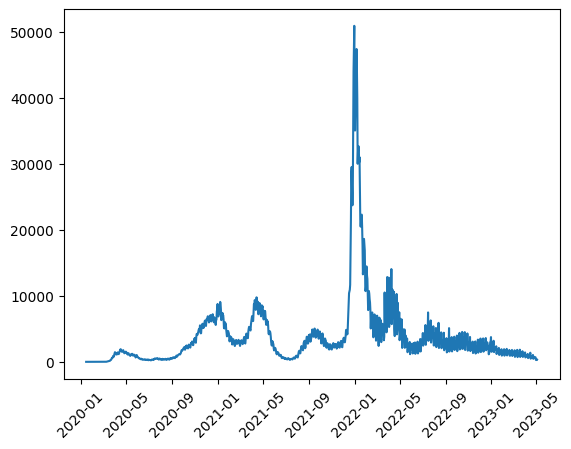

In [ ]:
caseurl="https://raw.githubusercontent.com/ccodwg/CovidTimelineCanada/main/data/can/cases_can.csv"
casesource=pd.read_csv(caseurl)
casesource["date"]=pd.to_datetime(casesource["date"])
casesource.index=casesource["date"]
plt.plot(casesource.loc[:,"date"],casesource.loc[:,"value_daily"])
plt.xticks(rotation=45)

In [ ]:
casesource

,name,region,date,value,value_daily
date,,,,,
2020-01-15,cases,CAN,2020-01-15,0,0
2020-01-16,cases,CAN,2020-01-16,0,0
2020-01-17,cases,CAN,2020-01-17,0,0
2020-01-18,cases,CAN,2020-01-18,0,0
2020-01-19,cases,CAN,2020-01-19,0,0
...,...,...,...,...,...
2023-04-29,cases,CAN,2023-04-29,4597414,681
2023-04-30,cases,CAN,2023-04-30,4597701,287
2023-05-01,cases,CAN,2023-05-01,4597969,268


In [ ]:
dailycase=casesource['2021-01-01':'2022-12-30']
dailycase

,name,region,date,value,value_daily
date,,,,,
2021-01-01,cases,CAN,2021-01-01,590917,7522
2021-01-02,cases,CAN,2021-01-02,597799,6882
2021-01-03,cases,CAN,2021-01-03,605404,7605
2021-01-04,cases,CAN,2021-01-04,612708,7304
2021-01-05,cases,CAN,2021-01-05,620572,7864
...,...,...,...,...,...
2022-12-26,cases,CAN,2022-12-26,4427757,1297
2022-12-27,cases,CAN,2022-12-27,4429649,1892
2022-12-28,cases,CAN,2022-12-28,4432278,2629


                                     name region       date     value  \
date                                                                    
2020-12-19  vaccine_administration_dose_1    CAN 2020-12-19     12368   
2020-12-20  vaccine_administration_dose_1    CAN 2020-12-20     12368   
2020-12-21  vaccine_administration_dose_1    CAN 2020-12-21     12368   
2020-12-22  vaccine_administration_dose_1    CAN 2020-12-22     12368   
2020-12-23  vaccine_administration_dose_1    CAN 2020-12-23     12368   
...                                   ...    ...        ...       ...   
2023-04-19  vaccine_administration_dose_1    CAN 2023-04-19  32464613   
2023-04-20  vaccine_administration_dose_1    CAN 2023-04-20  32464613   
2023-04-21  vaccine_administration_dose_1    CAN 2023-04-21  32464613   
2023-04-22  vaccine_administration_dose_1    CAN 2023-04-22  32464613   
2023-04-23  vaccine_administration_dose_1    CAN 2023-04-23  32388709   

            value_daily  rolling_avg  
date       

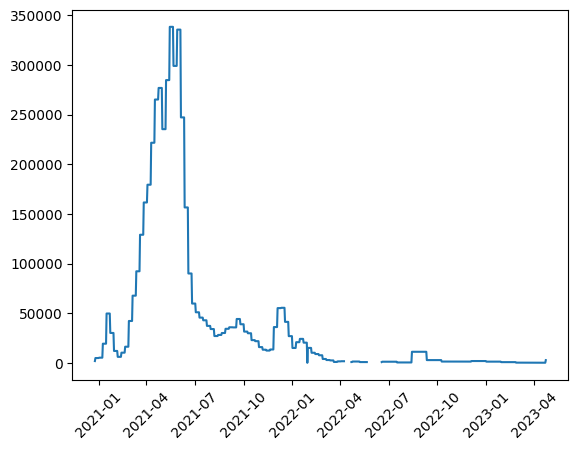

In [ ]:
## Read the total vaccine administration data
caseurl2="https://raw.githubusercontent.com/ccodwg/CovidTimelineCanada/main/data/can/vaccine_administration_dose_1_can.csv"
casesource2=pd.read_csv(caseurl2)
casesource2["date"]=pd.to_datetime(casesource2["date"])
casesource2.index=casesource2["date"]

# Fill missing values with 0
casesource2 = casesource2.fillna(0)

# Define date ranges for different window sizes
date_range1 = (casesource2['date'] <= '2022-04-08')
date_range2 = (casesource2['date'] >= '2022-04-09') & (casesource2['date'] <= '2022-05-21')
date_range3 = (casesource2['date'] >= '2022-05-22') 

# Calculate moving averages for different date ranges
rolling_avg1 = casesource2.loc[date_range1, 'value_daily'].rolling(window=7).mean()
rolling_avg2 = casesource2.loc[date_range2, 'value_daily'].rolling(window=14).mean()
rolling_avg3 = casesource2.loc[date_range3, 'value_daily'].rolling(window=28).mean()

# Combine the results into a single DataFrame
casesource2['rolling_avg'] = pd.concat([rolling_avg1, rolling_avg2, rolling_avg3])

plt.plot(casesource2.loc[:,"date"], abs(casesource2.loc[:,"rolling_avg"]))
plt.xticks(rotation=45)

print(casesource2)

In [ ]:
casesource2

,name,region,date,value,value_daily,rolling_avg
date,,,,,,
2020-12-19,vaccine_administration_dose_1,CAN,2020-12-19,12368,12368,NaN
2020-12-20,vaccine_administration_dose_1,CAN,2020-12-20,12368,0,NaN
2020-12-21,vaccine_administration_dose_1,CAN,2020-12-21,12368,0,NaN
2020-12-22,vaccine_administration_dose_1,CAN,2020-12-22,12368,0,NaN
2020-12-23,vaccine_administration_dose_1,CAN,2020-12-23,12368,0,NaN
...,...,...,...,...,...,...
2023-03-22,vaccine_administration_dose_1,CAN,2023-03-22,32467548,0,196.607143
2023-03-23,vaccine_administration_dose_1,CAN,2023-03-23,32467548,0,196.607143
2023-03-24,vaccine_administration_dose_1,CAN,2023-03-24,32467548,0,196.607143


In [ ]:
dailycase2=casesource2['2021-01-01':'2022-12-30']
dailycase2

,name,region,date,value,value_daily,rolling_avg
date,,,,,,
2021-01-01,vaccine_administration_dose_1,CAN,2021-01-01,46180,0,4830.285714
2021-01-02,vaccine_administration_dose_1,CAN,2021-01-02,82530,36350,5192.857143
2021-01-03,vaccine_administration_dose_1,CAN,2021-01-03,82530,0,5192.857143
2021-01-04,vaccine_administration_dose_1,CAN,2021-01-04,82530,0,5192.857143
2021-01-05,vaccine_administration_dose_1,CAN,2021-01-05,82530,0,5192.857143
...,...,...,...,...,...,...
2022-12-26,vaccine_administration_dose_1,CAN,2022-12-26,32408780,0,1806.607143
2022-12-27,vaccine_administration_dose_1,CAN,2022-12-27,32408780,0,1806.607143
2022-12-28,vaccine_administration_dose_1,CAN,2022-12-28,32408780,0,1806.607143


In [ ]:
## Read the total vaccine administration data
doseurl="https://raw.githubusercontent.com/ccodwg/CovidTimelineCanada/main/data/can/vaccine_administration_dose_1_can.csv"
dose1=pd.read_csv(doseurl)


# calculate the difference between i and i+1 entries in the value column
dose1['difference'] = dose1['value'].diff()

# create a new column to store daily average values
dose1['daily average'] = None

# compute the average of each group where a series of zeros is followed by a non-zero in the difference column
group_start = False
group_size = 0

for index, row in dose1.iterrows():
    if row['difference'] != 0 and group_start:
        non_zero_value = abs(row['value'])
        dose1.loc[index - group_size:index - 1, 'daily average'] = non_zero_value / group_size
        group_start = False
        group_size = 0

    if row['difference'] == 0 and not group_start:
        group_start = True

    if group_start:
        group_size += 1

# print the final dataframe
print(dose1)

#dose1["date"]=pd.to_datetime(dose1["date"])
#dose1.index=dose1["date"]
#plt.plot(dose1.loc[:,"date"], abs(dose1.loc[:,"daily average"]))
#plt.xticks(rotation=45)

# Calculate 7-day rolling average
##rolling_avg = casesource2['value_daily'].rolling(window=14).mean()

##plt.plot(casesource2.loc[:,"date"], abs(rolling_avg))
##plt.plot(casesource2.loc[:,"date"],abs(casesource2.loc[:,"value_daily"]))

                              name region        date     value  value_daily  \
0    vaccine_administration_dose_1    CAN  2020-12-19     12368        12368   
1    vaccine_administration_dose_1    CAN  2020-12-20     12368            0   
2    vaccine_administration_dose_1    CAN  2020-12-21     12368            0   
3    vaccine_administration_dose_1    CAN  2020-12-22     12368            0   
4    vaccine_administration_dose_1    CAN  2020-12-23     12368            0   
..                             ...    ...         ...       ...          ...   
823  vaccine_administration_dose_1    CAN  2023-03-22  32467548            0   
824  vaccine_administration_dose_1    CAN  2023-03-23  32467548            0   
825  vaccine_administration_dose_1    CAN  2023-03-24  32467548            0   
826  vaccine_administration_dose_1    CAN  2023-03-25  32467548            0   
827  vaccine_administration_dose_1    CAN  2023-03-26  32467086         -462   

     difference   daily average  
0    

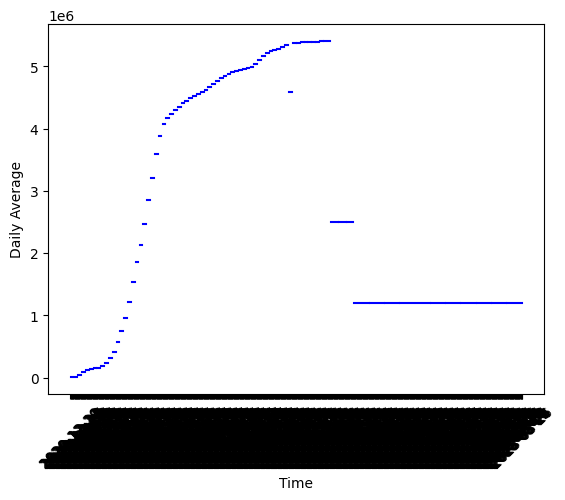

In [ ]:
# compute the moving average of the daily averages for each group
#window_size = 3 # choose a window size for the moving average
#dose1['moving average'] = dose1['daily average'].rolling(window_size, min_periods=1).mean()
#plt.plot(dose1['date'], dose1['moving average'], 'b-')

plt.plot(dose1['date'], dose1['daily average'], 'b-')
plt.xlabel('Time')
plt.ylabel('Daily Average')
plt.xticks(rotation=45)
plt.show()

# M,C data

In [ ]:

def getseries(mctype,url,column):
    source=pd.read_csv(url)
    mctypedata=source[source["Classify"]==mctype]
    return mctypedata.groupby(["Date"])[column].sum()

def getseriesnumber(mctype,url,column):
    source=pd.read_csv(url)
    mctypedata=source[source["Classify"]==mctype]
    return mctypedata.groupby(["Date"])[column].count()

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [58]:
url_bert="/content/drive/My Drive/Misinformation_Project/Audience_Influence_Score_30K_vaccine_21_22.csv"
column1="Impact Value"
column2="Overall Impact"
bert_vaccine1_M = getseries("M",url_bert,column1)
bert_vaccine2_M = getseries("M",url_bert,column2)
bert_vaccine1_C = getseries("C",url_bert,column1)
bert_vaccine2_C = getseries("C",url_bert,column2)
numberbert_vaccine1_M = getseriesnumber("M",url_bert,column1)
numberbert_vaccine2_M = getseriesnumber("M",url_bert,column2)
numberbert_vaccine1_C = getseriesnumber("C",url_bert,column1)
numberbert_vaccine2_C = getseriesnumber("C",url_bert,column2)

column3= "Audience Influence"
impact_vac_M = getseries("M",url_bert,column3)
impact_vac_C = getseries("C",url_bert,column3)


url_bert_interventions="/content/drive/My Drive/Misinformation_Project/Audience_Influence_Score_30K_interventions_21_22.csv"
bert_interventions1_M = getseries("M",url_bert_interventions,column1)
bert_interventions2_M = getseries("M",url_bert_interventions,column2)
bert_interventions1_C = getseries("C",url_bert_interventions,column1)
bert_interventions2_C = getseries("C",url_bert_interventions,column2)
numberbert_interventions1_M = getseriesnumber("M",url_bert_interventions,column1)
numberbert_interventions2_M = getseriesnumber("M",url_bert_interventions,column2)
numberbert_interventions1_C = getseriesnumber("C",url_bert_interventions,column1)
numberbert_interventions2_C = getseriesnumber("C",url_bert_interventions,column2)

impact_inter_M = getseries("M",url_bert,column3)
impact_inter_C = getseries("C",url_bert,column3)

In [59]:
Mnumbervac=pd.DataFrame()
Mnumbervac.index=pd.to_datetime(numberbert_vaccine1_M.index)
Mnumbervac["Mnumvac"]=numberbert_vaccine1_M.values
Mnumbervac=Mnumbervac.resample("D").mean().fillna(method="pad")
Cnumbervac=pd.DataFrame()
Cnumbervac.index=pd.to_datetime(numberbert_vaccine1_C.index)
Cnumbervac["Cnumvac"]=numberbert_vaccine1_C.values
Cnumbervac=Cnumbervac.resample("D").mean().fillna(method="pad")
Cnumbervac

,Cnumvac
Date,
2021-01-01,4.0
2021-01-02,2.0
2021-01-03,1.0
2021-01-04,7.0
2021-01-05,10.0
...,...
2022-12-26,1.0
2022-12-27,1.0
2022-12-28,1.0


In [60]:
Mimpactvac=pd.DataFrame()
Mimpactvac.index=pd.to_datetime(impact_vac_M.index)
Mimpactvac["M_Impact_Vac"]=impact_vac_M.values
Mimpactvac=Mimpactvac.resample("D").mean().fillna(method="pad")

Cimpactvac=pd.DataFrame()
Cimpactvac.index=pd.to_datetime(impact_vac_C.index)
Cimpactvac["C_Impact_Vac"]=impact_vac_C.values
Cimpactvac=Cimpactvac.resample("D").mean().fillna(method="pad")

#Mimpactvac
#Cimpactvac

In [61]:
Mimpactinter=pd.DataFrame()
Mimpactinter.index=pd.to_datetime(impact_inter_M.index)
Mimpactinter["M_Impact_Inter"]=impact_inter_M.values
Mimpactinter=Mimpactinter.resample("D").mean().fillna(method="pad")
Cimpactinter=pd.DataFrame()
Cimpactinter.index=pd.to_datetime(impact_inter_C.index)
Cimpactinter["C_Impact_Inter"]=impact_inter_C.values
Cimpactinter=Cimpactinter.resample("D").mean().fillna(method="pad")

#Mimpactinter
#Cimpactinter

# Merge to new CSV

In [62]:
data=pd.DataFrame()
data.index=dailycase.index
data["dailycase"]=pd.to_numeric(dailycase["value_daily"]).astype('float64')
data["acccase"]=pd.to_numeric(dailycase["value"]).astype('float64')
data["Mnuminter"]=pd.to_numeric(numberbert_interventions1_M.values).astype('float64')
data["Cnuminter"]=pd.to_numeric(numberbert_interventions1_C.values).astype('float64')
data["Mnumvac"]=Mimpactvac["M_Impact_Vac"]
data["Cnumvac"]=Cimpactvac["C_Impact_Vac"]
data

,dailycase,acccase,Mnuminter,Cnuminter,Mnumvac,Cnumvac
date,,,,,,
2021-01-01,7522.0,590917.0,23.0,27.0,47.0,12.0
2021-01-02,6882.0,597799.0,23.0,22.0,26.0,7.0
2021-01-03,7605.0,605404.0,27.0,22.0,27.0,2.0
2021-01-04,7304.0,612708.0,30.0,18.0,103.0,24.0
2021-01-05,7864.0,620572.0,40.0,19.0,192.0,34.0
...,...,...,...,...,...,...
2022-12-26,1297.0,4427757.0,6.0,1.0,13.0,3.0
2022-12-27,1892.0,4429649.0,4.0,6.0,27.0,3.0
2022-12-28,2629.0,4432278.0,8.0,5.0,12.0,3.0


In [63]:
data=pd.DataFrame()
data.index=dailycase.index
data["dailycase"]=pd.to_numeric(dailycase["value_daily"]).astype('float64')
data["acccase"]=pd.to_numeric(dailycase["value"]).astype('float64')
data["M_Impact_Inter"]=Mimpactinter["M_Impact_Inter"]
data["C_Impact_Inter"]=Cimpactinter["C_Impact_Inter"]
data["M_Impact_Vac"]=Mimpactvac["M_Impact_Vac"]
data["C_Impact_Vac"]=Cimpactvac["C_Impact_Vac"]
data

,dailycase,acccase,M_Impact_Inter,C_Impact_Inter,M_Impact_Vac,C_Impact_Vac
date,,,,,,
2021-01-01,7522.0,590917.0,47.0,12.0,47.0,12.0
2021-01-02,6882.0,597799.0,26.0,7.0,26.0,7.0
2021-01-03,7605.0,605404.0,27.0,2.0,27.0,2.0
2021-01-04,7304.0,612708.0,103.0,24.0,103.0,24.0
2021-01-05,7864.0,620572.0,192.0,34.0,192.0,34.0
...,...,...,...,...,...,...
2022-12-26,1297.0,4427757.0,13.0,3.0,13.0,3.0
2022-12-27,1892.0,4429649.0,27.0,3.0,27.0,3.0
2022-12-28,2629.0,4432278.0,12.0,3.0,12.0,3.0


(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01')])

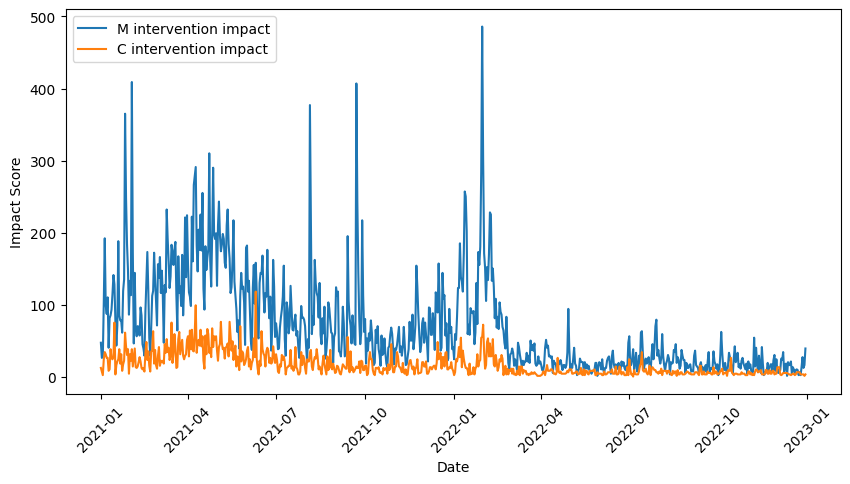

In [64]:
plt.figure(figsize=(10,5))
plt.plot(data['M_Impact_Inter'],label="M intervention impact")
plt.plot(data['C_Impact_Inter'],label="C intervention impact")
plt.xlabel('Date')
plt.ylabel('Impact Score')
plt.legend(prop = {"size": 10 }, loc ="upper left")
plt.xticks(rotation=45)

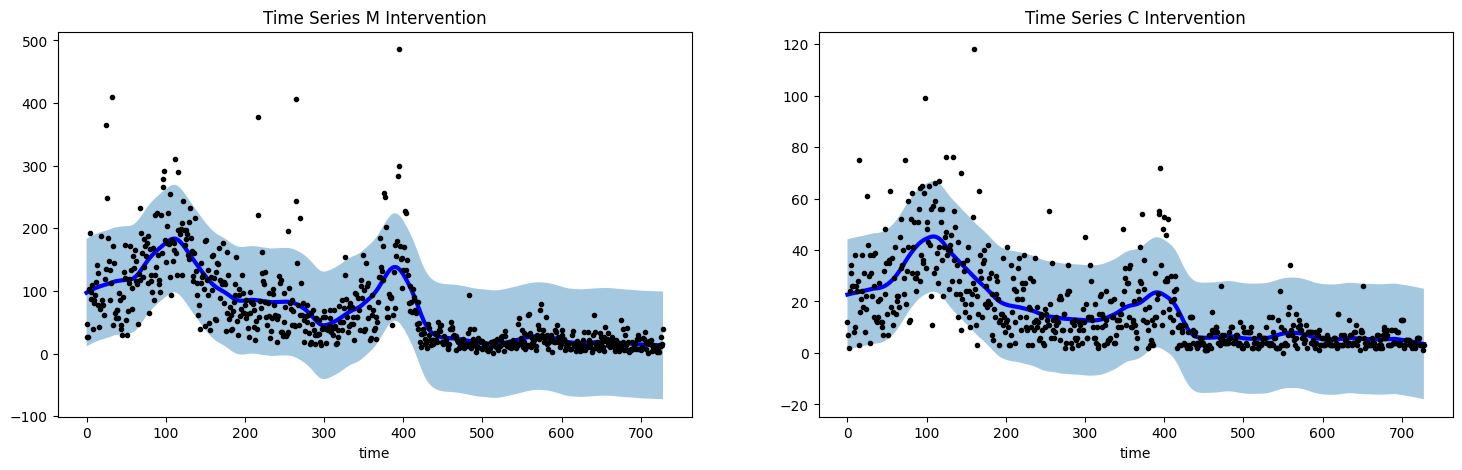

In [65]:
#!pip install tsmoothie

# import libraries
from tsmoothie.smoother import LowessSmoother

# operate smoothing
smoother1 = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother1.smooth(data['M_Impact_Inter'])
smoother2 = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother2.smooth(data['C_Impact_Inter'])

# generate intervals
low1, up1 = smoother1.get_intervals('prediction_interval')
low2, up2 = smoother2.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))
        
plt.subplot(1,2,1)
plt.plot(smoother1.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother1.data[0], '.k')
plt.title(f"Time Series M Intervention"); plt.xlabel('time')
plt.fill_between(range(len(smoother1.data[0])), low1[0], up1[0], alpha=0.4)
        
plt.subplot(1,2,2)
plt.plot(smoother2.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother2.data[0], '.k')
plt.title(f"Time Series C Intervention"); plt.xlabel('time')
plt.fill_between(range(len(smoother2.data[0])), low2[0], up2[0], alpha=0.4)



In [66]:
# create some example data
time = pd.date_range('2021-01-01', '2022-12-30')
data2 = pd.DataFrame(index=time)

data2['M_Impact_Inter_Smoothed'] = smoother1.smooth_data.flatten()
data2['C_Impact_Inter_Smoothed'] = smoother2.smooth_data.flatten()

data2.to_csv('/content/drive/My Drive/Misinformation_Project/smoothed_data.csv', index=False)

# Data Smoothing and Data Normilization

In [ ]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())     
    return df_norm

def roll_smoothing(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = df_norm[column].rolling(window=7).mean()     
    return df_norm
def ewm_smoothing(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = df_norm[column].ewm(span=20).mean()     
    return df_norm


datasmoothing=ewm_smoothing(data)
datanorm=min_max_scaling(datasmoothing)
datanorm.to_csv("/content/drive/My Drive/Misinformation_Project/datanorm.csv")
datasmoothing.to_csv("/content/drive/My Drive/Misinformation_Project/datasmoothing.csv")
data.to_csv("/content/drive/My Drive/Misinformation_Project/data.csv")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(datanorm["dailycase"], label="Normilized daily case")
plt.plot(datanorm["Cnuminter"], label="Normilized C intervention number")
plt.plot(datanorm["Mnuminter"], label="Normilized M intervention number")
#plt.plot(datanorm["Cnumvac"], label="Normilized C vaccine number")
#plt.plot(datanorm["Mnumvac"], label="Normilized M vaccine number")
#plt.plot(casedataontario["SummaryDate"][1:],dailycases,label="Case data")
plt.title('Normalized Intervention Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=60)
plt.legend(prop = {"size": 10 }, loc ="upper left")
plt.subplot(1,2,2)
##plt.plot(datanorm["dailycase"], label="normilized daily case")
#plt.plot(datanorm["Cnuminter"], label="Normilized C intervention number")
#plt.plot(datanorm["Mnuminter"], label="Normilized M intervention number")
plt.plot(datanorm["Cnumvac"], label="Normilized C vaccine number")
plt.plot(datanorm["Mnumvac"], label="Normilized M vaccine number")
#plt.plot(casedataontario["SummaryDate"][1:],dailycases,label="Case data")
plt.title('Normalized Vaccine Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=60)
plt.legend(prop = {"size": 10 }, loc ="upper left")

NameError: ignored

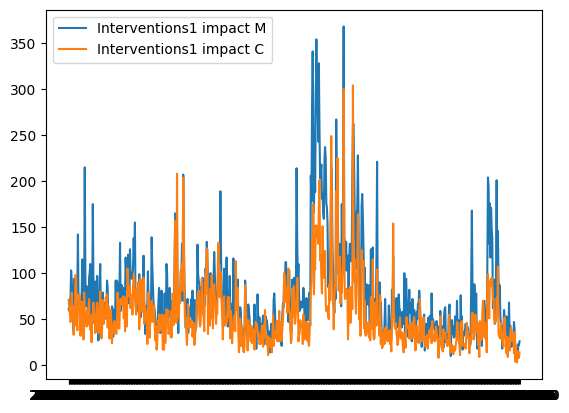

In [ ]:
plt.plot(bert_interventions1_M, label="Interventions1 impact M")
plt.plot(bert_interventions1_C, label="Interventions1 impact C")
plt.legend()

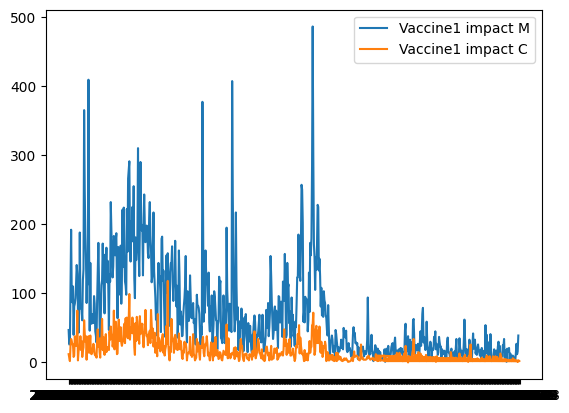

In [ ]:
plt.plot(bert_vaccine1_M, label="Vaccine1 impact M")
plt.plot(bert_vaccine1_C, label="Vaccine1 impact C")
plt.legend()

Date
2021-01-01     61
2021-01-02     59
2021-01-03     66
2021-01-04     75
2021-01-05    103
             ... 
2022-12-26     17
2022-12-27      8
2022-12-28     23
2022-12-29     22
2022-12-30     26
Name: Audience Influence, Length: 729, dtype: int64


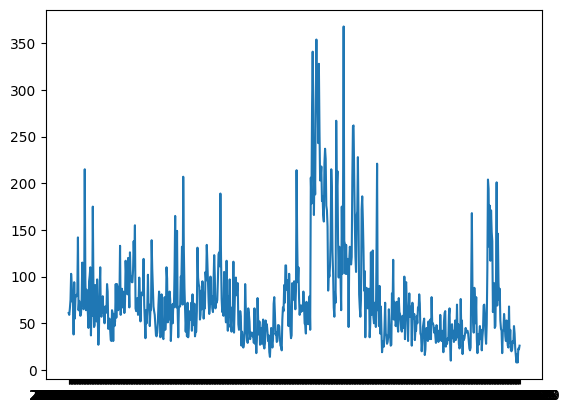

In [ ]:
print(bert_interventions1_M)
plt.plot(bert_interventions1_M)

Date
2021-01-01    23
2021-01-02    23
2021-01-03    27
2021-01-04    30
2021-01-05    40
              ..
2022-12-26     6
2022-12-27     4
2022-12-28     8
2022-12-29     9
2022-12-30     9
Name: Audience Influence, Length: 729, dtype: int64


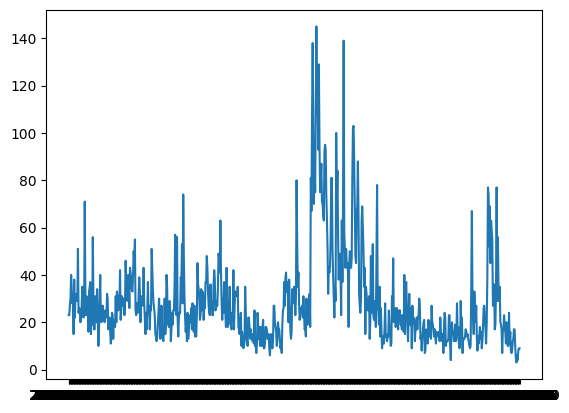

In [ ]:
print(numberbert_interventions1_M)
plt.plot(numberbert_interventions1_M)

Date
2021-01-01    -45.354848
2021-01-02     -8.860417
2021-01-03     -9.567995
2021-01-04     10.724192
2021-01-05   -102.203074
                 ...    
2022-12-26     -5.433333
2022-12-27    -23.138745
2022-12-28    -12.497222
2022-12-29     13.533730
2022-12-30     26.923214
Name: Overall Impact, Length: 727, dtype: float64


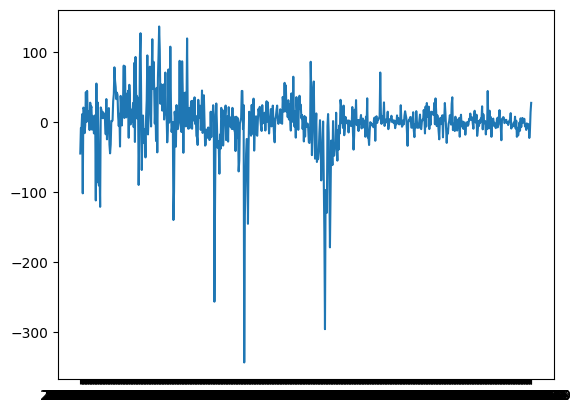

In [ ]:
print(bert_vaccine2_M)
plt.plot(bert_vaccine2_M)

Date
2021-01-01    15
2021-01-02    10
2021-01-03    10
2021-01-04    32
2021-01-05    62
              ..
2022-12-26     6
2022-12-27    10
2022-12-28     4
2022-12-29     6
2022-12-30    16
Name: Audience Influence, Length: 727, dtype: int64


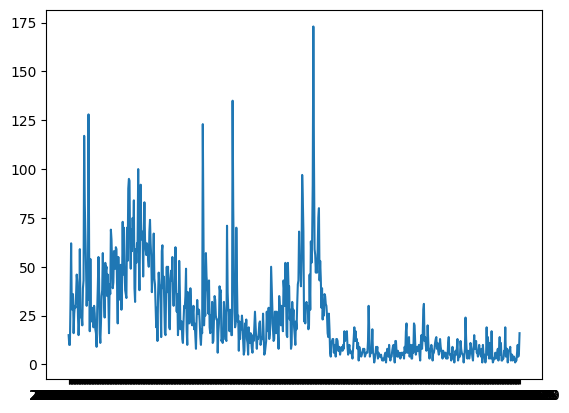

In [ ]:
print(numberbert_vaccine1_M)
plt.plot(numberbert_vaccine1_M)